In [1]:
using QuadGK
using Polynomials
using Plots
using DataFrames
using Printf

<a href="https://www.icsr.agh.edu.pl/~mownit/pdf/06_kwadratury.pdf"> Wykład </a>

Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [2]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki 
(xp,a)=gauss(Float64,7)


([-0.949108, -0.741531, -0.405845, 0.0, 0.405845, 0.741531, 0.949108], [0.129485, 0.279705, 0.38183, 0.417959, 0.38183, 0.279705, 0.129485])

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [3]:
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

### Zadanie 1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplentuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [4]:
function legendre(n)
    if n == 0
        return Poly([1])
    elseif n == 1
        return Poly([0,1])
    else
    return (2*n-1) / n * Poly([0,1]) * legendre(n-1) - (n-1) / n * legendre(n-2)
    end;
end;

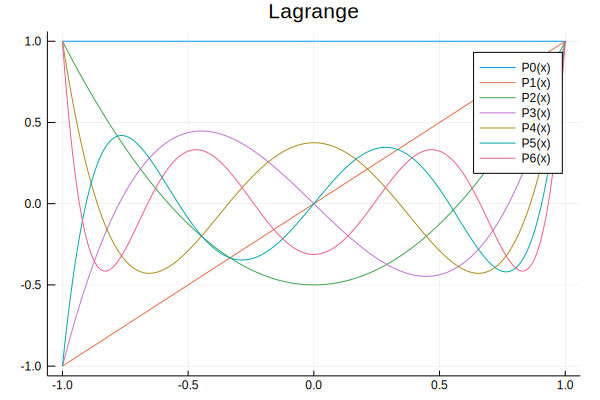

In [5]:
x = LinRange(-1, 1, 1000)
P = Dict(n => legendre(n) for n in range(0,6))
chart = plot(title="Lagrange")
for n in range(0,6)
    plot!(x,P[n](x), label=string("P",n,"(x)")) 
end

chart

In [6]:
for n in range(2,4)
    print("Legendre P", n, "(x): ", P[n], "\n\tRoots:\n\tLegendre - ", roots(P[n]), "\n\tGauss - ", gauss(n)[1], "\n\n")
end

Legendre P2(x): Poly(-0.5 + 1.5*x^2)
	Roots:
	Legendre - [-0.57735, 0.57735]
	Gauss - [-0.57735, 0.57735]

Legendre P3(x): Poly(-1.5*x + 2.5*x^3)
	Roots:
	Legendre - [-0.774597, 0.774597, 0.0]
	Gauss - [-0.774597, 0.0, 0.774597]

Legendre P4(x): Poly(0.375 - 3.75*x^2 + 4.375*x^4)
	Roots:
	Legendre - [-0.861136, 0.861136, -0.339981, 0.339981]
	Gauss - [-0.861136, -0.339981, 0.339981, 0.861136]



### Zadanie 2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [7]:
function fun(f, k)
    (xp,a)=gauss(Float64,k)
    sum(a .* f.(xp)) 
end

fun (generic function with 1 method)

In [8]:
df = DataFrame(Result=String[], Absolute_Error=String[], Relative_Error=String[])
f(x) = 27*x^26
int = 2.0

for k in range(1,20)
    r = fun(f, k)
    push!(df, [@sprintf("%.8E", r), @sprintf("%.8E", abs(int - r)), @sprintf("%.8E", abs((int - r) / int))])
end

print("Integral of f(x) = 27*x^26 equals F(x) = x^27 on [-1, 1] = 2")
df

Integral of f(x) = 27*x^26 equals F(x) = x^27 on [-1, 1] = 2

,Result,Absolute_Error,Relative_Error
,String,String,String
1,0.00000000E+00,2.00000000E+00,1.00000000E+00
2,3.38701756E-05,1.99996613E+00,9.99983065E-01
3,3.91820820E-02,1.96081792E+00,9.80408959E-01
4,3.85177831E-01,1.61482217E+00,8.07411085E-01
5,9.87605820E-01,1.01239418E+00,5.06197090E-01
6,1.50256746E+00,4.97432544E-01,2.48716272E-01
7,1.80446491E+00,1.95535093E-01,9.77675466E-02
8,1.93871300E+00,6.12869977E-02,3.06434989E-02
9,1.98496596E+00,1.50340369E-02,7.51701845E-03


##### Wniosek: Dla wielomianu stopnia 26 kwadratura zaczyna być dokładna dla $k\ge14$
Różnica między błędami względnymi pomiędzu $k\ge14$ i $k=13$ jest znacząca, gdzie dla $k=13$ jest on większy o kilka rzędów wielkości.

Zachodzi poniższe twierdzenie Gaussa, ponieważ dla $k=13$ kwadratura Gaussa
ma stopień dokładności $2\cdot13-1 = 25$, natomiast dla $k\ge14$ mamy już stopień dokładności równy co najmniej $n=26$.

### Twierdzenie o stopniu dokładności kwadratury Gaussa
    Teza:
        Kwadratura ma stopień dokładności 2n − 1 (dla n-punktowej kwadratury).
        P(x) = Q(x) · ϕn(x) + R(x) ; Q, R−stopnia < n.

### Zadanie 3
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [9]:
function fun2(f, a, b, k)
    (xi, ai)=gauss(Float64,k)
    sum(ai .* (b-a)/2 .* f.((b-a)/2 * xi + [(b+a)/2 for i in range(0,k-1)]))
end

fun2 (generic function with 1 method)

In [10]:
df = DataFrame(Result=String[], Absolute_Error=String[], Relative_Error=String[])
f(x) = 27*x^26
int = 134217729

for k in range(1,20)
    r = fun2(f, -1, 2, k)
    push!(df, [@sprintf("%.8E", r), @sprintf("%.8E", abs(int - r)), @sprintf("%.8E", abs((int - r) / int))])
end

print("Integral of f(x) = 27*x^26 equals F(x) = x^27 on [-1, 2] = 134217729")
df

Integral of f(x) = 27*x^26 equals F(x) = x^27 on [-1, 2] = 134217729

,Result,Absolute_Error,Relative_Error
,String,String,String
1,1.20699406E-06,1.34217729E+08,1.00000000E+00
2,1.34704839E+05,1.34083024E+08,9.98996371E-01
3,1.22426563E+07,1.21975073E+08,9.08785104E-01
4,5.41725332E+07,8.00451958E+07,5.96383178E-01
5,9.66195886E+07,3.75981404E+07,2.80127973E-01
6,1.21029401E+08,1.31883281E+07,9.82607004E-02
7,1.30748357E+08,3.46937193E+06,2.58488350E-02
8,1.33545758E+08,6.71970896E+05,5.00657328E-03
9,1.34125382E+08,9.23469761E+04,6.88038583E-04


##### Wniosek: Dla wielomianu stopnia 26 kwadratura zaczyna być dokładna dla $k\ge14$
Różnica między błędami względnymi pomiędzu $k\ge14$ i $k=13$ jest znacząca, gdzie dla $k=13$ jest on większy o kilka rzędów wielkości.

Tak jak wcześniej zachodzi twierdzenie Gaussa.

### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności
 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [11]:
f(x) = 27*x^26
println("Integral of f(x) = 27*x^26 equals F(x) = x^27")

a = -1
b = 1
int = 2
println("on [", a,", ",b, "] = ", int)

(res, err) = quadgk(f, a, b)
println((res, err))

a = -1
b = 2
int = 134217729
println("on [", a,", ",b, "] = ", int)
(res, err) = quadgk(f, a, b)

println((res, err))

Integral of f(x) = 27*x^26 equals F(x) = x^27
on [-1, 1] = 2
(2.0000000000000004, 6.135284479648999e-10)
on [-1, 2] = 134217729
(1.3421772900000003e8, 0.03233135467578929)


In [15]:
standard_gauss(x) = 1 / sqrt(2 * pi) * exp(-x^2 / 2)
a = -Inf
b = Inf
int = 1
println("on [", a,", ",b, "] = ", int)
(res, err) = quadgk(f, a, b)
println((res, err))

on [-Inf, Inf] = 1


DomainError: DomainError with -0.9999999995343387:
integrand produced Inf in the interval (-1.0, -0.9999999990686774)

### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie 
w zaleznosci od ilosci potrzebnych przedziałów  dla przykładowego wielomianu.

### Simpson's 3/8 rule
![Image](https://wikimedia.org/api/rest_v1/media/math/render/svg/8a671bf11cf72d7813e6b05820b649863fae741b)
The error of this method is:
![Image](https://wikimedia.org/api/rest_v1/media/math/render/svg/8bca2f0bde6db2630ad8bdfcd0d8ff9cbb5949a1)

In [13]:
function Simpsons_3_8_integral(f, a, b)
    return ((b - a) / 8) * (f(a) + 3 * f((2 * a + b) / 3) + 3 * f((a + 2 * b) / 3) + f(b))
end

function Simpsons_3_8_integral(f, a, b, n)
    h = (b - a) / n
    return sum([Simpsons_3_8_integral(f, a + i * h, a + (i + 1) * h) for i in range(0,n-1)])
end

Simpsons_3_8_integral (generic function with 2 methods)

In [14]:
f(x) = 27*x^26
Simpsons_3_8_integral(f, -1, 1, 100)

2.00002068909779

In [30]:
df = DataFrame(n=Int[], Result=String[], Absolute_Error=String[], Relative_Error=String[])
f(x) = 27*x^26
a = -1
b = 2
int = 134217729

for n in range(1,200)
    r = Simpsons_3_8_integral(f, a, b, n)
    push!(df, [n, @sprintf("%.8E", r), @sprintf("%.8E", abs(int - r)), @sprintf("%.8E", abs((int - r) / int))])
end

df

,n,Result,Absolute_Error,Relative_Error
,Int64,String,String,String
1,1,6.79477289E+08,5.45259560E+08,4.06250026E+00
2,2,3.40313897E+08,2.06096168E+08,1.53553610E+00
3,3,2.32445937E+08,9.82282075E+07,7.31857172E-01
4,4,1.85987335E+08,5.17696062E+07,3.85713620E-01
5,5,1.63494773E+08,2.92770437E+07,2.18130972E-01
6,6,1.51721674E+08,1.75039449E+07,1.30414552E-01
7,7,1.45179273E+08,1.09615440E+07,8.16698662E-02
8,8,1.41360834E+08,7.14310544E+06,5.32202824E-02
9,9,1.39036534E+08,4.81880509E+06,3.59028955E-02


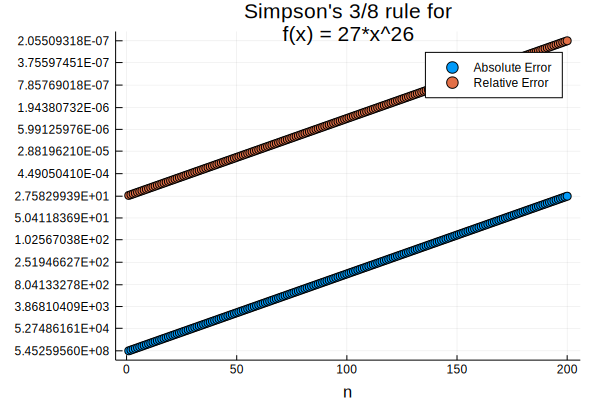

In [31]:
scatter(df[:n], [df[:Absolute_Error], df[:Relative_Error]], 
    label=["Absolute Error", "Relative Error"],
    title="Simpson's 3/8 rule for \nf(x) = 27*x^26",
    xlabel="n")

In [32]:
df = DataFrame(n=Int[], Result=String[], Absolute_Error=String[], Relative_Error=String[])
f(x) = 4*x^3 + 3*x^2 + 1
a = -2
b = 2
int = 20

for n in range(1,200)
    r = Simpsons_3_8_integral(f, a, b, n)
    push!(df, [n, @sprintf("%.8E", r), @sprintf("%.8E", abs(int - r)), @sprintf("%.8E", abs((int - r) / int))])
end

df

,n,Result,Absolute_Error,Relative_Error
,Int64,String,String,String
1,1,2.00000000E+01,0.00000000E+00,0.00000000E+00
2,2,2.00000000E+01,0.00000000E+00,0.00000000E+00
3,3,2.00000000E+01,7.10542736E-15,3.55271368E-16
4,4,2.00000000E+01,0.00000000E+00,0.00000000E+00
5,5,2.00000000E+01,0.00000000E+00,0.00000000E+00
6,6,2.00000000E+01,3.55271368E-15,1.77635684E-16
7,7,2.00000000E+01,0.00000000E+00,0.00000000E+00
8,8,2.00000000E+01,0.00000000E+00,0.00000000E+00
9,9,2.00000000E+01,0.00000000E+00,0.00000000E+00


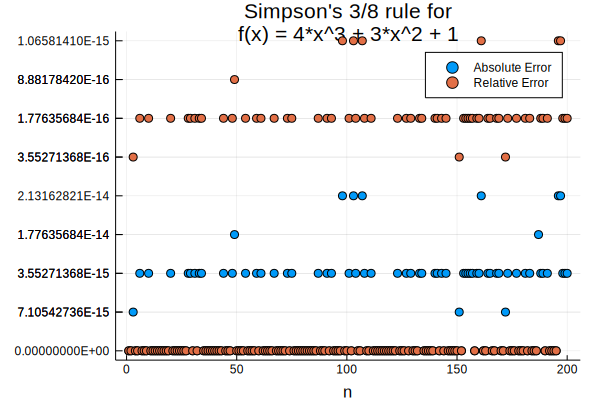

In [33]:
scatter(df[:n], [df[:Absolute_Error], df[:Relative_Error]], 
    label=["Absolute Error", "Relative Error"],
    title="Simpson's 3/8 rule for \nf(x) = 4*x^3 + 3*x^2 + 1",
    xlabel="n")